アンサンブル用シート

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import lightgbm as lgb
import category_encoders as ce
# import mojimoji
import re
from cmath import nan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import mean_squared_error
import japanize_matplotlib

###訓練データの読み込み
house_age = pd.read_csv('../data/handmade_data/house_age.csv')
area_size = pd.read_csv('../data/handmade_data/area_size.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
contract_span = pd.read_csv('../data/handmade_data/contract_span.csv')#欠損値をゼロ埋めした契約期間
contract_span2 = pd.read_csv('../data/handmade_data/contract_span2.csv')#欠損値を欠損値のままにした契約期間
reg_rent = pd.read_csv('../data/handmade_data/reg_rent.csv')
floor_scores = pd.read_csv('../data/handmade_data/floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「所在階」
floor_scores2 = pd.read_csv('../data/handmade_data/floor_scores2.csv')#「所在階」と「全体の階数」が独立している「所在階」
Floor_scores = pd.read_csv('../data/handmade_data/capital_floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「全体の階数」
Floor_scores2 = pd.read_csv('../data/handmade_data/capital_floor_scores2.csv')#「所在階」と「全体の階数」が独立している「全体の階数」
stations = pd.read_csv('../data/handmade_data/stations.csv')
minits = pd.read_csv('../data/handmade_data/minits.csv')
addresses = pd.read_csv('../data/handmade_data/addresses.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
buildings = pd.read_csv('../data/handmade_data/buildings.csv')

rent = pd.read_csv('../data/handmade_data/rent.csv')


##テストデータの読み込み
test_house_age = pd.read_csv('../data/test_data/test_house_age.csv')
test_area_size = pd.read_csv('../data/test_data/test_area_size.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_contract_span = pd.read_csv('../data/test_data/test_contract_span.csv')
test_contract_span2 = pd.read_csv('../data/test_data/test_contract_span2.csv')
test_reg_rent = pd.read_csv('../data/test_data/test_reg_rent.csv')
test_floor_scores = pd.read_csv('../data/test_data/test_floor_scores.csv')
test_floor_scores2 = pd.read_csv('../data/test_data/test_floor_scores2.csv')
test_Floor_scores = pd.read_csv('../data/test_data/test_capital_floor_scores.csv')
test_Floor_scores2 = pd.read_csv('../data/test_data/test_capital_floor_scores2.csv')
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_minits = pd.read_csv('../data/test_data/test_minits.csv')
test_addresses = pd.read_csv('../data/test_data/test_addresses.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_buildings = pd.read_csv('../data/test_data/test_buildings.csv')

Duplicate key in file PosixPath('/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family : IPAexGothic')


In [2]:
average_result = []
average_result = pd.DataFrame(average_result)

GBDT_result = pd.read_csv('../data/result_data/GBDT_cv_result.csv')
DART_result = pd.read_csv('../data/result_data/DART_cv_result.csv')
GOSS_result = pd.read_csv('../data/result_data/GOSS_cv_result.csv')
XGB_result = pd.read_csv('../data/result_data/XGB_cv_result.csv')
CatBoost_result = pd.read_csv('../data/result_data/CatBoost_cv_result.csv')

average_result = (GBDT_result['0'] + DART_result['0']+ GOSS_result['0'] + XGB_result['0'])/4
average_result.reset_index()

,index,0
0,0,129053.160557
1,1,119933.655348
2,2,74418.833970
3,3,55941.989083
4,4,102696.184276
...,...,...
31257,31257,109576.925180
31258,31258,99552.818854
31259,31259,175053.499393
31260,31260,264804.561337


In [3]:
df = pd.read_csv('../data/outer_data/test.csv')
id = df['id']
average_result = pd.concat([id, average_result],axis=1)
average_result.to_csv('../data/result_data/average_result.csv',index=False)

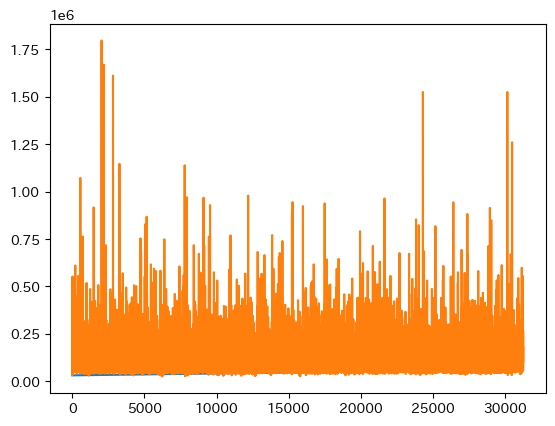

In [4]:
plt.plot(average_result)

In [5]:
corr = pd.concat([GBDT_result['0'], DART_result['0'], GOSS_result['0'], XGB_result['0'], CatBoost_result['0']], axis=1)
corr.corr()

,0,0,0,0,0
0,1.000000,0.992067,0.991784,0.982841,0.946120
0,0.992067,1.000000,0.991056,0.987729,0.948718
0,0.991784,0.991056,1.000000,0.988576,0.952918
0,0.982841,0.987729,0.988576,1.000000,0.956762
0,0.946120,0.948718,0.952918,0.956762,1.000000


単純な平均ではなく、重みつけを行う！

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import lightgbm as lgb
import category_encoders as ce
# import mojimoji
import re
from cmath import nan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import mean_squared_error
import japanize_matplotlib

###訓練データの読み込み
house_age = pd.read_csv('../data/handmade_data/house_age.csv')
area_size = pd.read_csv('../data/handmade_data/area_size.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
contract_span = pd.read_csv('../data/handmade_data/contract_span.csv')#欠損値をゼロ埋めした契約期間
contract_span2 = pd.read_csv('../data/handmade_data/contract_span2.csv')#欠損値を欠損値のままにした契約期間
reg_rent = pd.read_csv('../data/handmade_data/reg_rent.csv')
floor_scores = pd.read_csv('../data/handmade_data/floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「所在階」
floor_scores2 = pd.read_csv('../data/handmade_data/floor_scores2.csv')#「所在階」と「全体の階数」が独立している「所在階」
Floor_scores = pd.read_csv('../data/handmade_data/capital_floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「全体の階数」
Floor_scores2 = pd.read_csv('../data/handmade_data/capital_floor_scores2.csv')#「所在階」と「全体の階数」が独立している「全体の階数」
stations = pd.read_csv('../data/handmade_data/stations.csv')
minits = pd.read_csv('../data/handmade_data/minits.csv')
addresses = pd.read_csv('../data/handmade_data/addresses.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
buildings = pd.read_csv('../data/handmade_data/buildings.csv')

rent = pd.read_csv('../data/handmade_data/rent.csv')


##テストデータの読み込み
test_house_age = pd.read_csv('../data/test_data/test_house_age.csv')
test_area_size = pd.read_csv('../data/test_data/test_area_size.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_contract_span = pd.read_csv('../data/test_data/test_contract_span.csv')
test_contract_span2 = pd.read_csv('../data/test_data/test_contract_span2.csv')
test_reg_rent = pd.read_csv('../data/test_data/test_reg_rent.csv')
test_floor_scores = pd.read_csv('../data/test_data/test_floor_scores.csv')
test_floor_scores2 = pd.read_csv('../data/test_data/test_floor_scores2.csv')
test_Floor_scores = pd.read_csv('../data/test_data/test_capital_floor_scores.csv')
test_Floor_scores2 = pd.read_csv('../data/test_data/test_capital_floor_scores2.csv')
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_minits = pd.read_csv('../data/test_data/test_minits.csv')
test_addresses = pd.read_csv('../data/test_data/test_addresses.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_buildings = pd.read_csv('../data/test_data/test_buildings.csv')

In [27]:
average_result = []
average_result = pd.DataFrame(average_result)

GBDT_result = pd.read_csv('../data/result_data/GBDT_cv_result.csv')
DART_result = pd.read_csv('../data/result_data/DART_cv_result.csv')
GOSS_result = pd.read_csv('../data/result_data/GOSS_cv_result.csv')
XGB_result = pd.read_csv('../data/result_data/XGB_cv_result.csv')
CatBoost_result = pd.read_csv('../data/result_data/CatBoost_cv_result.csv')

GBDT = 16784
DART = 16749
GOSS = 16837
XGB =  16594
CatBoost = 18269
total = GBDT + DART + GOSS + XGB + CatBoost
precise_rank = [GBDT, DART, GOSS, XGB, CatBoost]
precise_rank = np.sort(precise_rank)

ex_average_result = (precise_rank[2]/total)*GBDT_result['0'] + (precise_rank[3]/total)*DART_result['0']+ (precise_rank[1]/total)*GOSS_result['0'] + (precise_rank[4]/total)*XGB_result['0'] + (precise_rank[0]/total)*CatBoost_result['0']
ex_average_result.reset_index()

,index,0
0,0,127938.210822
1,1,121721.271092
2,2,73050.709041
3,3,55037.157406
4,4,105086.511723
...,...,...
31257,31257,109270.049091
31258,31258,101862.350770
31259,31259,173966.168248
31260,31260,265656.641232


In [28]:
df = pd.read_csv('../data/outer_data/test.csv')
id = df['id']
ex_average_result = pd.concat([id, ex_average_result],axis=1)
ex_average_result.to_csv('../data/result_data/ex_average_result.csv',index=False)

In [29]:
ex_average_result

,id,0
0,31471,127938.210822
1,31472,121721.271092
2,31473,73050.709041
3,31474,55037.157406
4,31475,105086.511723
...,...,...
31257,62728,109270.049091
31258,62729,101862.350770
31259,62730,173966.168248
31260,62731,265656.641232


In [30]:
precise_rank[0]/total

0.19468985017540155

In [31]:
precise_rank[1]/total

0.19650839463588046

In [32]:
precise_rank[2]/total

0.19691903370760153

In [33]:
precise_rank[3]/total

0.19754085858763623

In [34]:
precise_rank[4]/total

0.21434186289348023